In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
filepath = r"C:/Users/User/Downloads/reviews_Grocery_and_Gourmet_Food_5.json"
gr_revs_df = pd.read_json(filepath, lines=True)
gr_revs_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013"
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014"
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4,Yum!,1381190400,"10 8, 2013"
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5,Unexpected flavor meld,1369008000,"05 20, 2013"
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013"


In [12]:
gr_revs_df['date_stamp'] = pd.to_datetime(gr_revs_df.reviewTime)
gr_revs_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,date_stamp
0,A1VEELTKS8NLZB,616719923X,Amazon Customer,"[0, 0]",Just another flavor of Kit Kat but the taste i...,4,Good Taste,1370044800,"06 1, 2013",2013-06-01
1,A14R9XMZVJ6INB,616719923X,amf0001,"[0, 1]",I bought this on impulse and it comes from Jap...,3,"3.5 stars, sadly not as wonderful as I had hoped",1400457600,"05 19, 2014",2014-05-19
2,A27IQHDZFQFNGG,616719923X,Caitlin,"[3, 4]",Really good. Great gift for any fan of green t...,4,Yum!,1381190400,"10 8, 2013",2013-10-08
3,A31QY5TASILE89,616719923X,DebraDownSth,"[0, 0]","I had never had it before, was curious to see ...",5,Unexpected flavor meld,1369008000,"05 20, 2013",2013-05-20
4,A2LWK003FFMCI5,616719923X,Diana X.,"[1, 2]",I've been looking forward to trying these afte...,4,"Not a very strong tea flavor, but still yummy ...",1369526400,"05 26, 2013",2013-05-26


In [30]:
gr_byday_df = (gr_revs_df[["date_stamp", "overall"]]
              .query("date_stamp > 2006")
              .groupby(["date_stamp"])
              .agg("mean")
              )

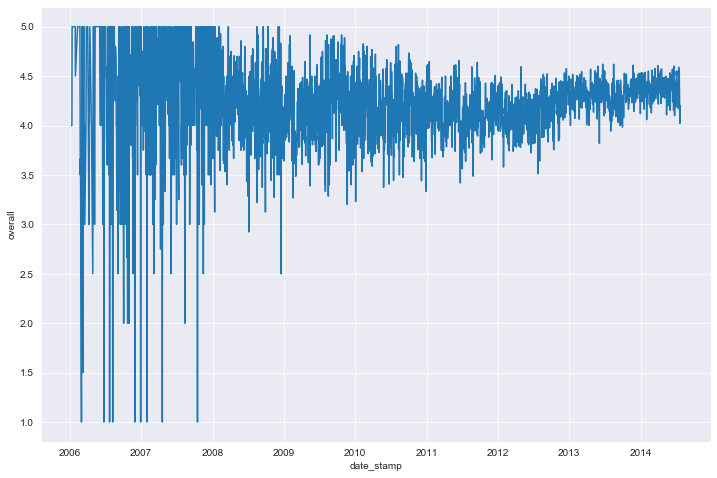

In [28]:
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=gr_byday_df.index, y=gr_byday_df["overall"], ax=ax)

# Time Series Modeling with Box-Jenkins
## Model Identification
### Augmented Dickey-Fuller unit root test
Tests for stationarity: Null hypothesis is that there is a unit root; alt is stationarity.
Lag number should be on the high side: too few lags lets serial correlation bias the test; too many reduces test power.

In [33]:
adf_keys = dict.fromkeys(['test_stat', 'pvalue', 'lags_used', 'no_obs', 
                          'crit_vals_1_5_10', 'infocrit_best', 'resultstore'])
adf_result = {i: j for i, j in 
              zip(adf_keys, sm.tsa.stattools.adfuller(gr_byday_df.overall))}
adf_result

{'test_stat': -6.3623225216345105,
 'pvalue': 2.457162987415963e-08,
 'lags_used': 28,
 'no_obs': 2927,
 'crit_vals_1_5_10': {'1%': -3.4325860929804404,
  '5%': -2.8625279573644873,
  '10%': -2.5672959172141048},
 'infocrit_best': 2849.290218378369}

The very small p-value indicates that we can reject the h0 and conclude the time series is stationary. 
## Find model parameters


1.1 Differencing
Below are some tips during identification.

Unit Root Tests. Use unit root statistical tests on the time series to determine whether or not it is stationary. Repeat after each round of differencing.
Avoid over differencing. Differencing the time series more than is required can result in the addition of extra serial correlation and additional complexity.
1.2 Configuring AR and MA
Two diagnostic plots can be used to help choose the p and q parameters of the ARMA or ARIMA. They are:

Autocorrelation Function (ACF). The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coefficient between -1 and 1 for negative and positive correlation.
Partial Autocorrelation Function (PACF). The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.
Both plots are drawn as bar charts showing the 95% and 99% confidence intervals as horizontal lines. Bars that cross these confidence intervals are therefore more significant and worth noting.

Some useful patterns you may observe on these plots are:

The model is AR if the ACF trails off after a lag and has a hard cut-off in the PACF after a lag. This lag is taken as the value for p.
The model is MA if the PACF trails off after a lag and has a hard cut-off in the ACF after the lag. This lag value is taken as the value for q.
The model is a mix of AR and MA if both the ACF and PACF trail off.
2. Estimation
Estimation involves using numerical methods to minimize a loss or error term.

We will not go into the details of estimating model parameters as these details are handled by the chosen library or tool.

I would recommend referring to a textbook for a deeper understanding of the optimization problem to be solved by ARMA and ARIMA models and optimization methods like Limited-memory BFGS used to solve it.

3. Diagnostic Checking
The idea of diagnostic checking is to look for evidence that the model is not a good fit for the data.

Two useful areas to investigate diagnostics are:

Overfitting
Residual Errors.
3.1 Overfitting
The first check is to check whether the model overfits the data. Generally, this means that the model is more complex than it needs to be and captures random noise in the training data.

This is a problem for time series forecasting because it negatively impacts the ability of the model to generalize, resulting in poor forecast performance on out of sample data.

Careful attention must be paid to both in-sample and out-of-sample performance and this requires the careful design of a robust test harness for evaluating models.

3.2 Residual Errors
Forecast residuals provide a great opportunity for diagnostics.

A review of the distribution of errors can help tease out bias in the model. The errors from an ideal model would resemble white noise, that is a Gaussian distribution with a mean of zero and a symmetrical variance.

For this, you may use density plots, histograms, and Q-Q plots that compare the distribution of errors to the expected distribution. A non-Gaussian distribution may suggest an opportunity for data pre-processing. A skew in the distribution or a non-zero mean may suggest a bias in forecasts that may be correct.

Additionally, an ideal model would leave no temporal structure in the time series of forecast residuals. These can be checked by creating ACF and PACF plots of the residual error time series.

The presence of serial correlation in the residual errors suggests further opportunity for using this information in the model.